In [2]:
from wandb_data_loader import WandbDataLoader
import scienceplots
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('science')
plt.rcParams['text.usetex'] = False

In [3]:
wandb_data_loader = WandbDataLoader(
    entity="dduka-max-planck-society",
)

df = wandb_data_loader.download_group_runs(
    project="Thesis",
    group_name="Random Timestamp Shift",
    metric_names=["test_avg_ndcg", "test_avg_map", "test_egtea_top_1_accuracy", "test_egtea_mean_class_accuracy", "test_charades_ego_mAP"],
    name_filter="DUAL_ENCODER_PRETRAIN_BASELINE_256_RANDOM_SHIFT_WIND-.*-.*-1.0",
)

# Filter runs that do not contain "test_avg_map"
df = df[df["test_avg_map"].notna()]

wandb: Currently logged in as: dduka (dduka-max-planck-society) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Found 21 runs in group 'Random Timestamp Shift'
Downloaded data shape: (21, 79)


In [4]:
results = {}
for i in range(len(df)):
    run_id = df.iloc[i]['run_id']

    # Extract the scales from the run name
    scales = df.iloc[i]['run_name'].split("WIND-")[-1].split("-")
    min_scale = float(scales[0])
    max_scale = float(scales[1])

    if min_scale != max_scale:
        continue

    df_history = wandb_data_loader.download_run_history(
        project="Thesis",
        run_id=run_id,
        # metric_names=["test_avg_ndcg", "test_avg_map", "test_egtea_top_1_accuracy", "test_egtea_mean_class_accuracy", "test_charades_ego_mAP"]
        metric_names=["test_egtea_top_1_accuracy", "test_egtea_mean_class_accuracy", "test_charades_ego_mAP"]
    )

    if df_history.empty:
        continue

    # test_avg_map = df_history["test_avg_map"]
    
    # Get the index of the max value in the test_avg_map column
    # max_index = test_avg_map.idxmax()
    
    # Get the value of the test_avg_ndcg column at that index
    # max_test_avg_map = df_history.loc[max_index, "test_avg_map"]
    # max_test_avg_ndcg = df_history.loc[max_index, "test_avg_ndcg"]

    results[min_scale] = {
        # "test_avg_map": max_test_avg_map,
        # "test_avg_ndcg": max_test_avg_ndcg
        "test_egtea_top_1_accuracy": df_history["test_egtea_top_1_accuracy"],
        "test_egtea_mean_class_accuracy": df_history["test_egtea_mean_class_accuracy"],
        "test_charades_ego_mAP": df_history["test_charades_ego_mAP"]
    }

# Order based on the keys
results = dict(sorted(results.items()))

In [5]:
print(results)

{1.1: {'test_egtea_top_1_accuracy': 0    31.15727
Name: test_egtea_top_1_accuracy, dtype: float64, 'test_egtea_mean_class_accuracy': 0    28.57464
Name: test_egtea_mean_class_accuracy, dtype: float64, 'test_charades_ego_mAP': 0    0.206355
Name: test_charades_ego_mAP, dtype: float64}, 1.2: {'test_egtea_top_1_accuracy': 0    32.542038
Name: test_egtea_top_1_accuracy, dtype: float64, 'test_egtea_mean_class_accuracy': 0    27.374507
Name: test_egtea_mean_class_accuracy, dtype: float64, 'test_charades_ego_mAP': 0    0.217613
Name: test_charades_ego_mAP, dtype: float64}, 1.3: {'test_egtea_top_1_accuracy': 0    30.563798
Name: test_egtea_top_1_accuracy, dtype: float64, 'test_egtea_mean_class_accuracy': 0    26.876892
Name: test_egtea_mean_class_accuracy, dtype: float64, 'test_charades_ego_mAP': 0    0.208478
Name: test_charades_ego_mAP, dtype: float64}, 1.4: {'test_egtea_top_1_accuracy': 0    30.712166
Name: test_egtea_top_1_accuracy, dtype: float64, 'test_egtea_mean_class_accuracy': 0    27

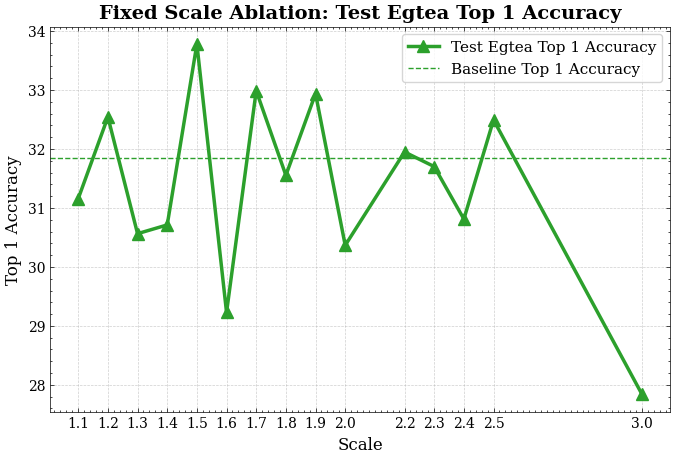

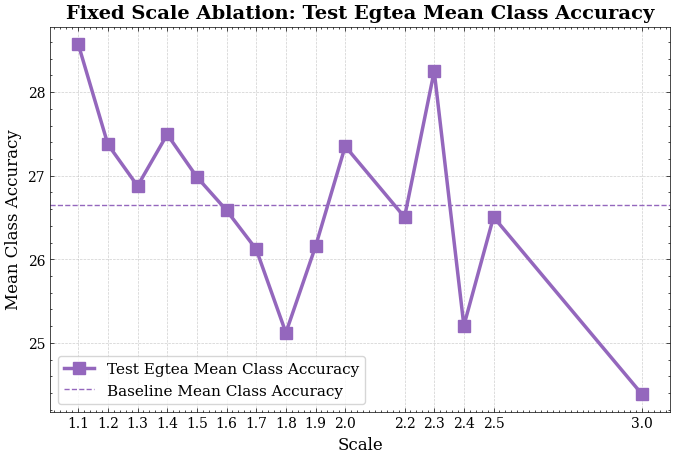

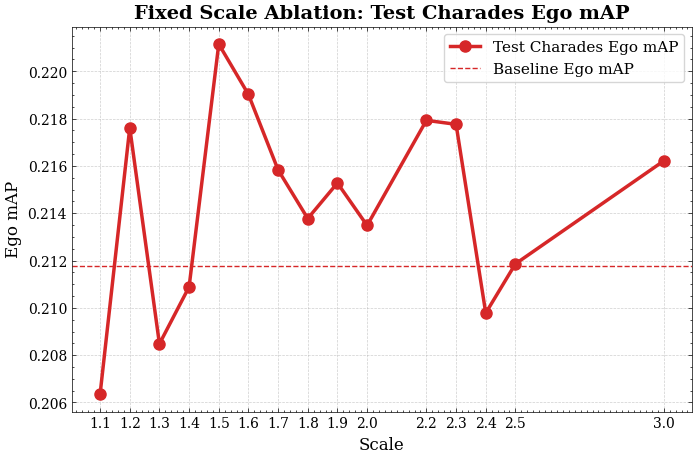

In [6]:
# Extract keys and values
scales = list(results.keys())
test_egtea_top_1_accuracies = [results[scale]['test_egtea_top_1_accuracy'] for scale in scales]
test_egtea_mean_class_accuracies = [results[scale]['test_egtea_mean_class_accuracy'] for scale in scales]
test_charades_ego_mAPs = [results[scale]['test_charades_ego_mAP'] for scale in scales]

# Convert scales to numeric (if possible)
try:
    x = np.array(scales, dtype=float)
except ValueError:
    x = np.arange(len(scales))

# Baseline values
baseline_top_1_accuracy_value = 31.849
baseline_mean_class_accuracy_value = 26.6522
baseline_charades_ego_mAP_value = 0.21176

# --- Plot 3: Top 1 Accuracy ---
plt.figure(figsize=(8, 5))
plt.plot(x, test_egtea_top_1_accuracies, marker='^', linewidth=2.5, markersize=8,
         color='#2ca02c', label='Test Egtea Top 1 Accuracy')
plt.axhline(y=baseline_top_1_accuracy_value, color='#2ca02c', linestyle='--', label='Baseline Top 1 Accuracy')
plt.xlabel('Scale', fontsize=12)
plt.ylabel('Top 1 Accuracy', fontsize=12)
plt.title('Fixed Scale Ablation: Test Egtea Top 1 Accuracy', fontsize=14, fontweight='bold')
plt.xticks(x, scales, rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(frameon=True, fontsize=11)
plt.show()

# --- Plot 4: Mean Class Accuracy ---
plt.figure(figsize=(8, 5))
plt.plot(x, test_egtea_mean_class_accuracies, marker='s', linewidth=2.5, markersize=8,
         color='#9467bd', label='Test Egtea Mean Class Accuracy')
plt.axhline(y=baseline_mean_class_accuracy_value, color='#9467bd', linestyle='--', label='Baseline Mean Class Accuracy')
plt.xlabel('Scale', fontsize=12)
plt.ylabel('Mean Class Accuracy', fontsize=12)
plt.title('Fixed Scale Ablation: Test Egtea Mean Class Accuracy', fontsize=14, fontweight='bold')
plt.xticks(x, scales, rotation=0, fontsize=10)
plt.yticks(fontsize=10) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(frameon=True, fontsize=11)
plt.show()


# --- Plot 5: Charades Ego mAP ---
plt.figure(figsize=(8, 5))
plt.plot(x, test_charades_ego_mAPs, marker='o', linewidth=2.5, markersize=8,
         color='#d62728', label='Test Charades Ego mAP')
plt.axhline(y=baseline_charades_ego_mAP_value, color='#d62728', linestyle='--', label='Baseline Ego mAP')
plt.xlabel('Scale', fontsize=12)
plt.ylabel('Ego mAP', fontsize=12)
plt.title('Fixed Scale Ablation: Test Charades Ego mAP', fontsize=14, fontweight='bold')
plt.xticks(x, scales, rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(frameon=True, fontsize=11)
plt.show()

In [7]:
results = {}
for i in range(len(df)):
    run_id = df.iloc[i]['run_id']

    # Extract the scales from the run name
    scales = df.iloc[i]['run_name'].split("WIND-")[-1].split("-")
    min_scale = float(scales[0])
    max_scale = float(scales[1])

    if min_scale != max_scale:
        continue

    df_history = wandb_data_loader.download_run_history(
        project="Thesis",
        run_id=run_id,
        metric_names=["test_avg_ndcg", "test_avg_map"]
    )

    if df_history.empty:
        continue

    test_avg_map = df_history["test_avg_map"]
    
    # Get the index of the max value in the test_avg_map column
    max_index = test_avg_map.idxmax()
    
    # Get the value of the test_avg_ndcg column at that index
    max_test_avg_map = df_history.loc[max_index, "test_avg_map"]
    max_test_avg_ndcg = df_history.loc[max_index, "test_avg_ndcg"]

    results[min_scale] = {
        "test_avg_map": max_test_avg_map,
        "test_avg_ndcg": max_test_avg_ndcg
    }

# Order based on the keys
results = dict(sorted(results.items()))

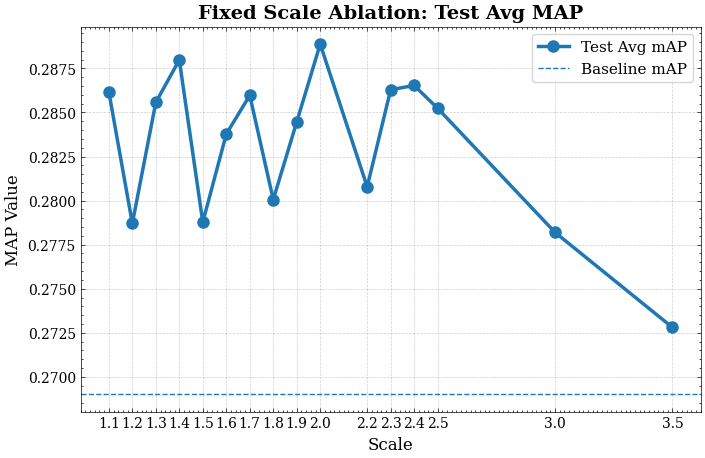

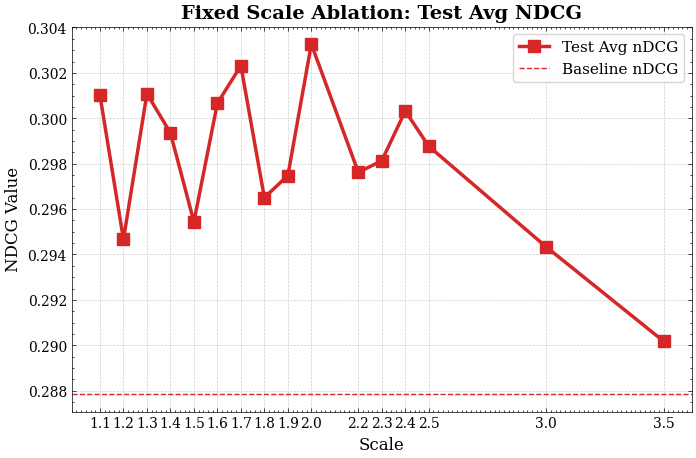

In [8]:
# Extract keys and values
scales = list(results.keys())
test_avg_maps = [results[scale]['test_avg_map'] for scale in scales]
test_avg_ndcgs = [results[scale]['test_avg_ndcg'] for scale in scales]

# Convert scales to numeric (if possible)
try:
    x = np.array(scales, dtype=float)
except ValueError:
    x = np.arange(len(scales))

# Baseline values
baseline_avg_maps_value = 0.26902
baseline_avg_ndcgs_value = 0.28785

# --- Plot 1: MAP ---
plt.figure(figsize=(8, 5))
plt.plot(x, test_avg_maps, marker='o', linewidth=2.5, markersize=8,
         color='#1f77b4', label='Test Avg mAP')
plt.axhline(y=baseline_avg_maps_value, color='#1f77b4', linestyle='--', label='Baseline mAP')
plt.xlabel('Scale', fontsize=12)
plt.ylabel('MAP Value', fontsize=12)
plt.title('Fixed Scale Ablation: Test Avg MAP', fontsize=14, fontweight='bold')
plt.xticks(x, scales, rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(frameon=True, fontsize=11)
plt.show()

# --- Plot 2: NDCG ---
plt.figure(figsize=(8, 5))
plt.plot(x, test_avg_ndcgs, marker='s', linewidth=2.5, markersize=8,
         color='#d62728', label='Test Avg nDCG')
plt.axhline(y=baseline_avg_ndcgs_value, color='#d62728', linestyle='--', label='Baseline nDCG')
plt.xlabel('Scale', fontsize=12)
plt.ylabel('NDCG Value', fontsize=12)
plt.title('Fixed Scale Ablation: Test Avg NDCG', fontsize=14, fontweight='bold')
plt.xticks(x, scales, rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(frameon=True, fontsize=11)
plt.show()